In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from nn import Net

from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

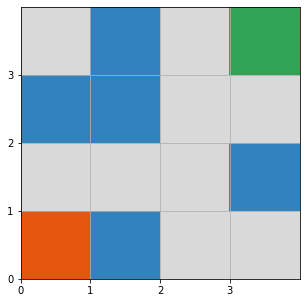

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=300,
    full_state=False,
)

In [4]:
target_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

policy_net = Net(
    input_dim=deterministic_env.n_states,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    log_freq=100,
    train_freq=3,
    batch_size=50,
    w_sync_freq=10,
    memory_size=5000,
    epsilon_start=0.8,
    epsilon_decay=0.990,
    gamma=0.9,
    step_size=0.001,
    episodes=2000,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.MSELoss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.01)
)

dqn.run()

Episode: 100, Reward: -10.200000000000003, Loss: 2.325345039367676
Episode: 200, Reward: 4.75, Loss: 2.563000202178955
Episode: 300, Reward: 3.0, Loss: 1.3615496158599854
Episode: 400, Reward: 4.75, Loss: 1.0153964757919312
Episode: 500, Reward: 4.75, Loss: 2.26242995262146
Episode: 600, Reward: -0.3999999999999986, Loss: 5.1427154541015625
Episode: 700, Reward: 4.75, Loss: 0.48351359367370605
Episode: 800, Reward: 4.75, Loss: 0.42711973190307617
Episode: 900, Reward: 4.75, Loss: 0.5455366373062134
Episode: 1000, Reward: 4.75, Loss: 0.3579966723918915
Episode: 1100, Reward: 4.75, Loss: 0.8436987400054932
Episode: 1200, Reward: 4.75, Loss: 0.7502380609512329
Episode: 1300, Reward: 4.75, Loss: 0.23548021912574768
Episode: 1400, Reward: 4.75, Loss: 0.12212114036083221
Episode: 1500, Reward: 3.8499999999999996, Loss: 0.2750743329524994
Episode: 1600, Reward: 4.75, Loss: 0.22620482742786407
Episode: 1700, Reward: 4.75, Loss: 0.160944402217865
Episode: 1800, Reward: 4.75, Loss: 0.11948680877

In [5]:
_, action_seq = dqn.evaluate_one_episode()
dqn.env.animate(action_seq=action_seq, filename='dqn.mp4')
Video('dqn.mp4')

In [6]:
dqn.evaluate()

#### Training

Text(0.5, 1.0, 'Epsilon decay per episode')

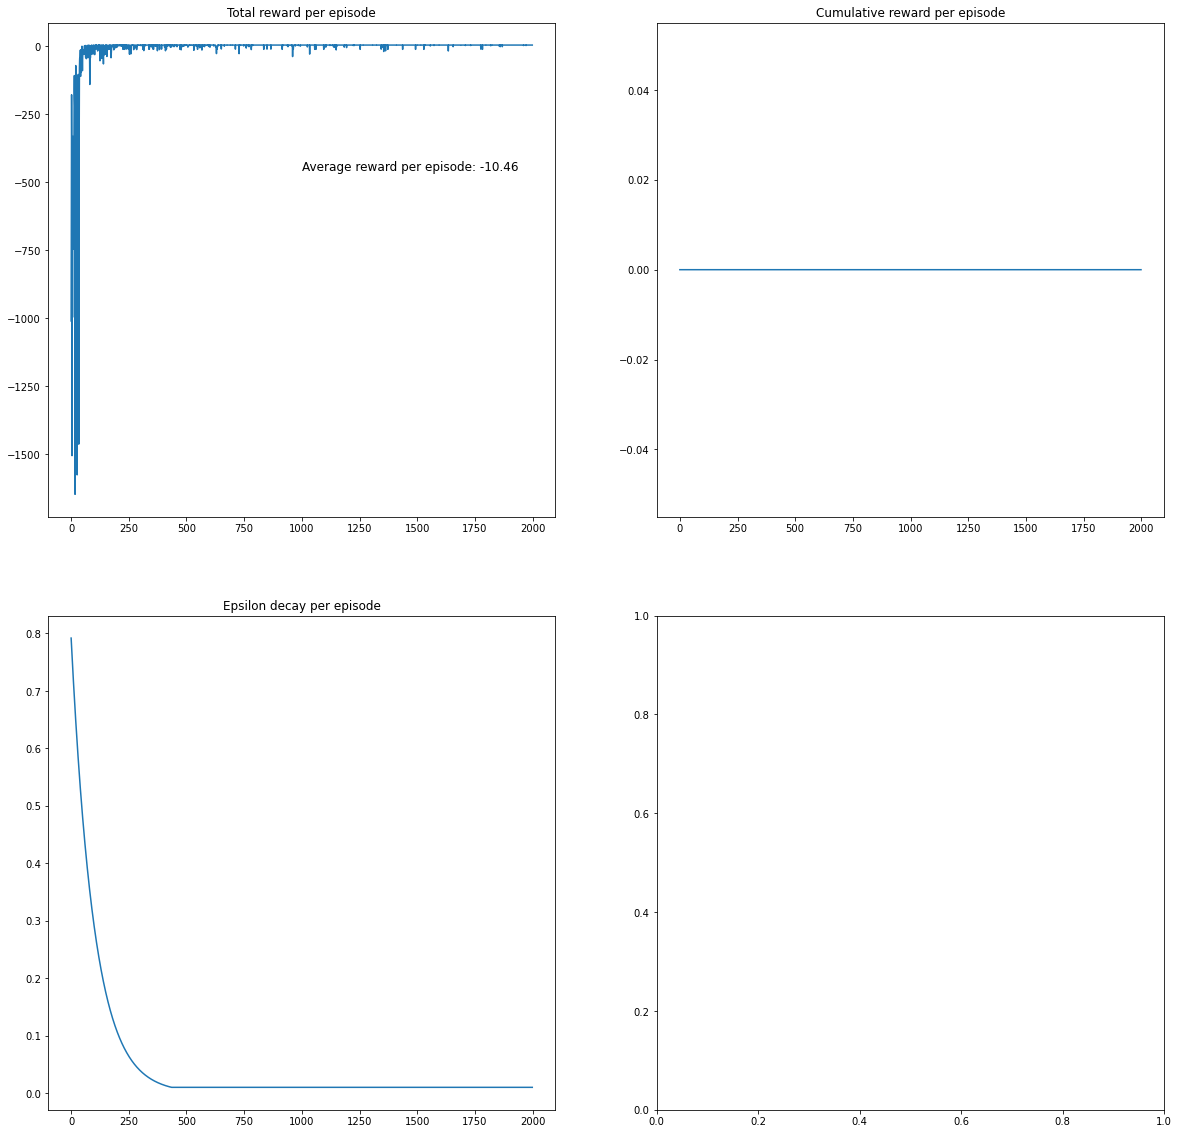

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20))

total_rewards = [log['reward'] for _, log in dqn.logs.items()]
mean_rewards = sum(total_rewards)/len(total_rewards)
ax[0][0].plot(range(dqn.episodes), total_rewards)
ax[0][0].text(0.5, 0.7, f'Average reward per episode: {round(mean_rewards, 2)}', transform=ax[0][0].transAxes, size='large')
ax[0][0].set_title('Total reward per episode')

cumulative_rewards = [log['cumulative_reward'] for _, log in dqn.logs.items()]
ax[0][1].plot(range(dqn.episodes), cumulative_rewards)
ax[0][1].set_title('Cumulative reward per episode')

ax[1][0].plot(range(dqn.episodes), [log['epsilon'] for _, log in dqn.logs.items()])
ax[1][0].set_title('Epsilon decay per episode')

#### Evaluation

Text(0.5, 1.0, 'Cumulative reward per episode')

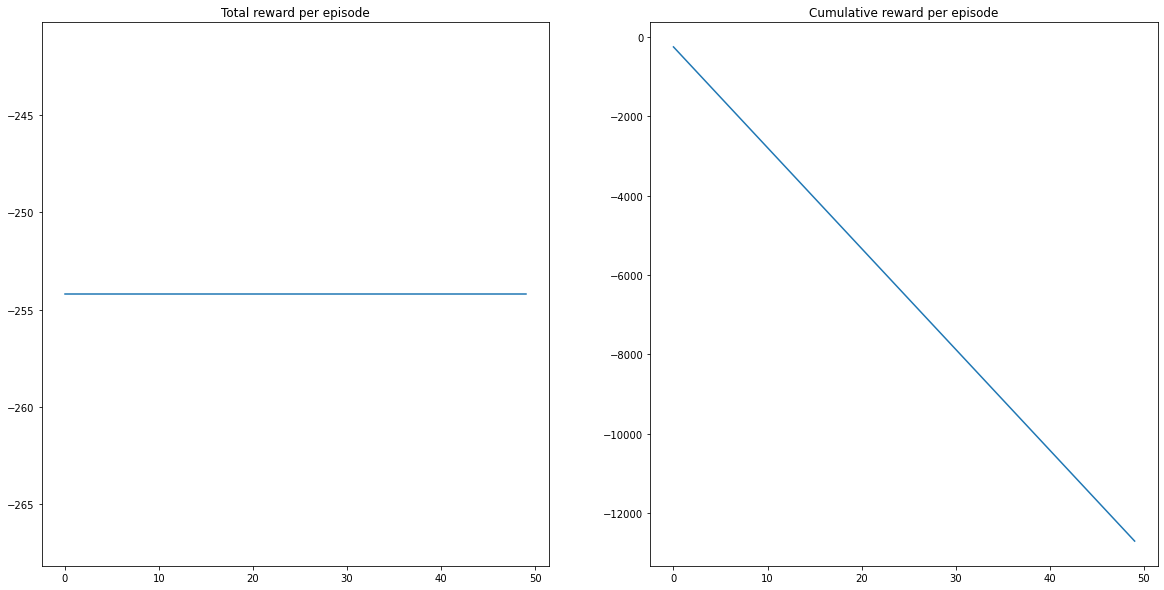

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

ax[0].plot(range(dqn.eval_episodes), [log['reward'] for _, log in dqn.eval_logs.items()])
ax[0].set_title('Total reward per episode')

ax[1].plot(range(dqn.eval_episodes), [log['cumulative_reward'] for _, log in dqn.eval_logs.items()])
ax[1].set_title('Cumulative reward per episode')